### 【AIコース】教師なし学習課題
### 課題　卸売業者　教師なし学習

### 導入

### 【課題】教師なし学習とは何か記述せよ
データを扱う前に、教師なし学習への理解の確認です。以下の観点を含めて文章で記述しましょう。以降の設問も含め、インターネットや書籍で調べても構いません。

- 教師あり学習との比較
- どんなときに使うのか
- 具体的にどんなものがあるのか

答え：
1. 教師あり学習との比較
    - 教師あり学習
        - データセットの中に人間が与えた正解（ターゲット）が入っていて，特徴量から正解を導き出すための方法を学習する。そして，それから未知データの正解を予測する。クラス分類と回帰がある。
    - 教師なし学習
        - データセットの中に教師情報である正解がなく，教師あり学習で言う特徴量だけしかないデータを使い分析を行い，データの構造を調べることで意味のある情報を取り出す。
2. どんなときに使うのか
    - クラスタリングによりグループを発見する
        - k-means，階層的クラスタリング（凝集型完全連結法が代表），DBSCAN
    - 教師あり学習の前処理として次元削減をする
        - 特徴量選択
            - filter法，wrapper法，embedded法（L1 normalization，RandomForest等）
        - 特徴量抽出
            - PCA，LDA，kernel PCA，whitening 白色化，t-SNE，ICA，CCA
3. 具体的にどんなものがあるのか
    - 前項に併記した

### 【課題】必要なライブラリをimport

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

### データ取得

### 【課題】csvファイルの読み込み

https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

事前にダウンロードした

In [2]:
data_original = pd.read_csv('Wholesale customers data.csv')

### データを眺める

In [3]:
print("サンプルの数：{} 　特徴量の数：{}\n".format(*data_original.shape))
print("各特徴量の型\n",data_original.dtypes,"\n")
print("統計量の要約")
display(data_original.describe())
display(data_original.head())
print(data_original.info())

サンプルの数：440 　特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None


### 【課題】不要な特徴量を消す

In [4]:
#元のデータはdata_originalに格納しておく

#dataからChannelとRegionの2列を削除するコードを記述
data = data_original.drop(['Channel', 'Region'], axis=1)

#消えていることを確認
display(data_original.head())
display(data.head())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### scatter matrixを描く

C:\Users\yamak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178C4D55B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000178C5966F28>]], dtype=object)

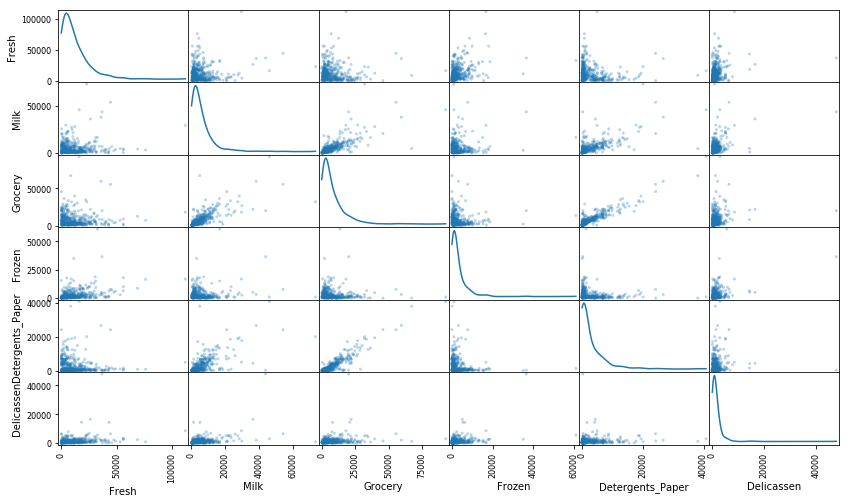

In [5]:
pd.scatter_matrix(data, 
                  alpha = 0.3, 
                  figsize = (14, 8), 
                  diagonal = 'kde')

### Feature Scaling

### 【課題】Feature Scalingの実行

In [6]:
#dataに対して適切なFeature Scalingを行うコードを記述

data_fs = np.log(data)

data_fs.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### 【課題】なぜFeature Scalingが必要なのか記述せよ
Feature Scalingを行う理由とはなんでしょう。文章で記述してください。

scatter matrixがどのように変化したか見るのも良いでしょう。

答え：

主成分分析PCAが極めてスケールに対して敏感だから，各特徴量のスケールを揃える必要があります。

PCAの理論の詳細は理解できていませんが，主成分を抽出するときに，分散，共分散，固有値，固有ベクトル等々が使われるようです。

PCAがスケールに対して敏感である理由は，

これらの値が算出されるデータのスケールが揃っていないと，主成分を抽出するときに，各特徴量が公平に扱われなくなり，主成分の妥当性が下がるからと考えられます。

次の図を見て判るのは，スケーリング後は，スケーリング前に比べて，散らばりぐあいが格段に良くなっています。

C:\Users\yamak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178C7806D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000178C7EEF320>]], dtype=object)

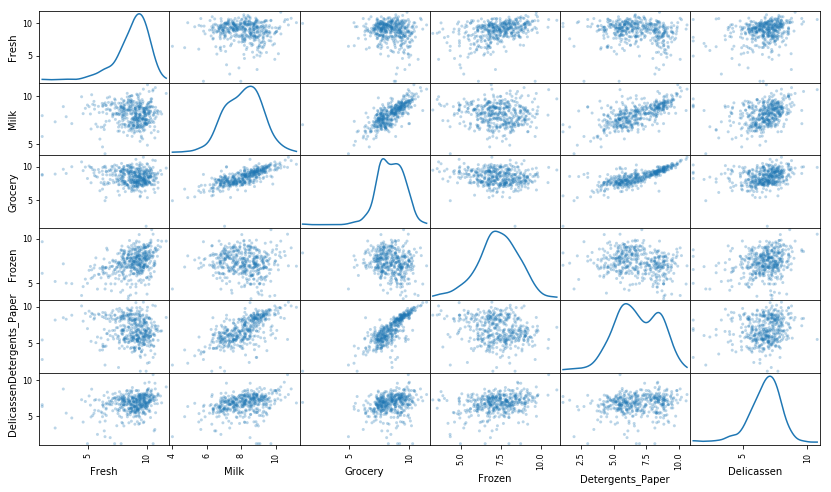

In [7]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

### Feature Extraction

### 【課題】PCAの実行

(6,)
(6,)


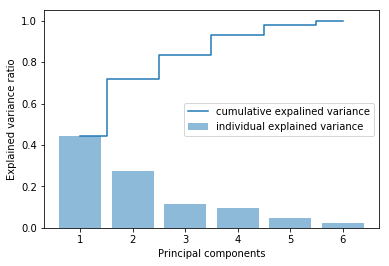

In [8]:
# data_fsに対しPCAを行い分散説明率の累積を確認
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
data_fs_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(var_exp.shape)
print(cum_var_exp.shape)

n = 6
plt.bar(range(1,n+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,n+1), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

(2,)
(2,)


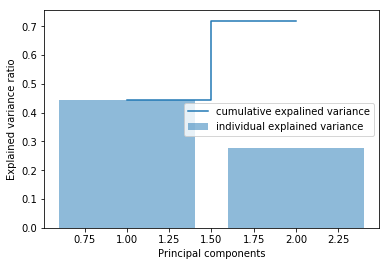

In [9]:
# data_fsに対しPCAを行い分散説明率の累積を確認
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(var_exp.shape)
print(cum_var_exp.shape)

n = 2
plt.bar(range(1,n+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,n+1), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

### 【課題】なぜPCAを行うのか記述せよ

機械学習の前処理としてなぜPCAが必要なのかについて記述してください。

答え：

まず，次元削減の必要性については，大きく分けて２つあります。

次元が多くなると，次元の呪いといわれる過学習しやすくなり，汎化能力が下がります。

もう１つは，計算量が幾何級数的に増えて，計算コストが格段に上がります。

PCAは，次元が減っているのにも関わらず，減数にもよるが元の特徴量の特性が相当量残っているので，次元削減のデメリットが少ないと考えられます。

### クラスタリング

### 【課題】クラスタリングとは何か記述せよ
クラスタリングについての説明を記述してください。その際、以下の観点を含めてください。

いつ何に使うのか

階層的手法と非階層的手法との違い

クラス分類（classification）との比較

答え：

- いつ何に使うのか
    - データセットに教師情報つまりクラスラベルがないときに，クラスタと呼ばれるグループに分割するタスクである。目的は，同じクラスタ内のデータが類似していて，異なるクラスタのデータは異なるように，データを分割することである。
- 階層的手法と非階層的手法との違い
    - 階層的手法には，凝集型と分割型があり，全く逆のアプローチをする。凝集型は，最初にすべてのサンプルを別のクラスタとし，似ているクラスタをまとめていく。分割型は最初にすべてサンプルを１つクラスタとし，順次二分してゆき，最終的にリーフまで分割していく。階層的手法は，ツリー状のデンドログラムをプロットできるので，意味のある分割を解釈しやすい。
    - 非階層的手法には，プロトコルベースと密度ベースがある。前者の代表が，k-means法であり，分割数kが与えられ，その数のセントロイドをばらまき，その周りのサンプルとの距離を算出しながらクラスタを形成していく。後者の代表が，DBSCANであり，密度を定義し，コア点とボーダー点を見出しクラスタを形成していく。
- クラス分類（classification）との比較
    - クラス分類は教師あり学習であり，データセットの中にクラスラベルを教師情報として与えられ，クラスラベルを当てるように学習していく。結果的にクラスラベルのユニーク数に分割されるが，目的は他にあり，クラスラベルのない未知データがどこに分類されるかを予測することである。分割そのものが目的であるクラスタリングとは全く違うものである。

### 【課題】樹状図を描く
まずは階層的手法を使い、樹状図を描いてみます。手法はいくつもありましたが、ward法が良いでしょう。

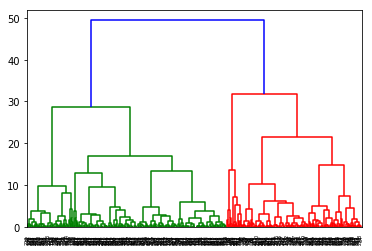

In [10]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

row_clusters = linkage(pdist(data_pca, metric='euclidean'), 
                       method='ward')

row_dender = dendrogram(row_clusters, 
                        # labels=name
                       )
plt.show()

### 【課題】k-meansにおけるkの値の検討
クラスタリングはk-meansが定石です。まずはクラスタ数kの値を検討します。

まずはそのためのコードを記述し、その後選んだkの値と、それに決めた理由を記述してください。

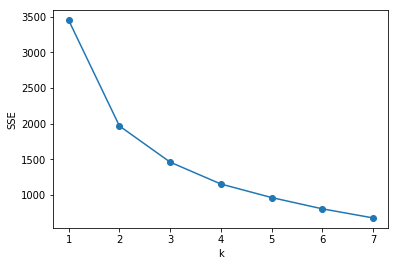

In [11]:
from sklearn.cluster import KMeans
k = 8
SSE = []
for i in range(1, k):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=1e-04, 
                random_state=0,
                n_jobs=-1
               )
    km.fit(data_pca)
    SSE.append(km.inertia_)

plt.plot(range(1, k), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

# Loop through clusters
for n_clusters in np.arange(6)+2:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(data_pca)

    # TODO: Predict the cluster for each data point
    y_pred = clusterer.predict(data_pca)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X=data_pca, labels=y_pred, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {:.3f}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.419
For n_clusters = 3. The average silhouette_score is : 0.393
For n_clusters = 4. The average silhouette_score is : 0.330
For n_clusters = 5. The average silhouette_score is : 0.350
For n_clusters = 6. The average silhouette_score is : 0.360
For n_clusters = 7. The average silhouette_score is : 0.365


k = 2

理由：

エルボー法では，はっきりしているわけではないが，2分割のところにエルボーがある。

シルエット法では，やはり，2分割が最もスコアが良い。

ドロップした特徴量'Channel'はクラスラベルが2分割であり，今回，2分割したクラスタと比較すると，89.1% が一致しているので，'Channel'以外のクラスタリングに使った特徴量に大きな影響を与えている（コードは後述）。

念のため，次に，クラスタ数 2～6 のシルエット図を描いたところ，クラスタ数 2 が妥当のようです。

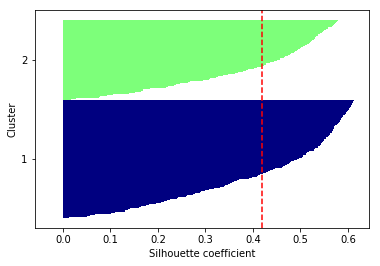

In [13]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)

y_km = km.fit_predict(data_pca)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

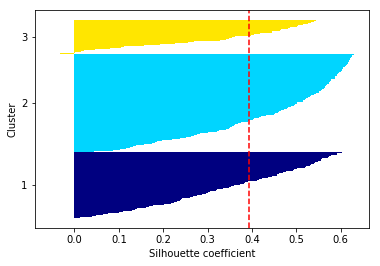

In [14]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)

y_km = km.fit_predict(data_pca)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

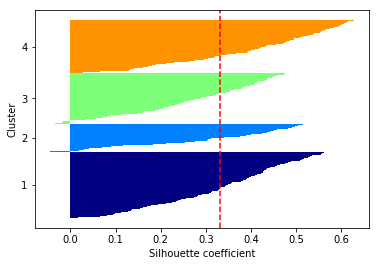

In [15]:
km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)

y_km = km.fit_predict(data_pca)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

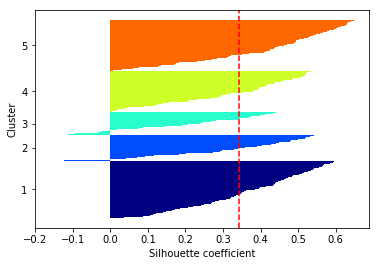

In [16]:
km = KMeans(n_clusters=5, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)

y_km = km.fit_predict(data_pca)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

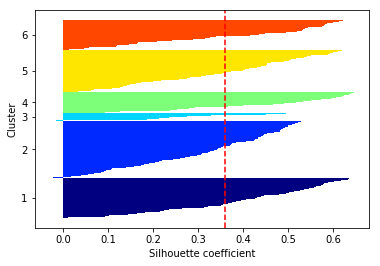

In [17]:
km = KMeans(n_clusters=6, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)

y_km = km.fit_predict(data_pca)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

### 【課題】k-meansの実行

2分割で試みる

In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)

y_km = km.fit_predict(data_pca)

### 【課題】クラスタリングの可視化
PCAにより特徴量は可視化可能な次元に落ちているはずです。可視化することで分かってくることもあります。散布図を描き、クラスタ毎に色分けしましょう。中心点（セントロイド）もプロットしてみます。

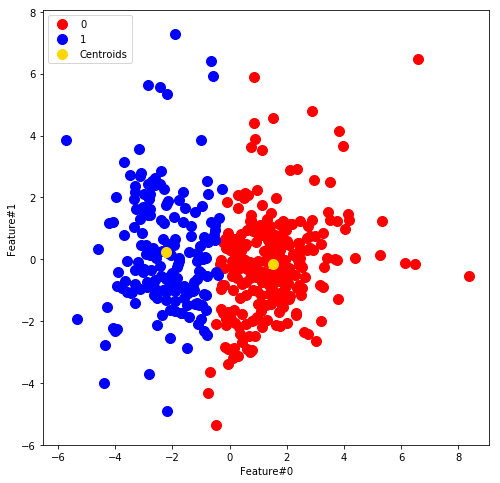

In [19]:
import matplotlib.pyplot as plt
y_pred = y_km
X_data = data_pca
plt.figure(figsize=(8, 8))

plt.scatter(X_data[y_pred == 0, 0], X_data[y_pred == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(X_data[y_pred == 1, 0], X_data[y_pred == 1, 1], s = 100, c = 'blue', label = '1')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'gold', label = 'Centroids')

plt.xlabel("Feature#0")
plt.ylabel("Feature#1")
plt.legend()
plt.show()

### クラスタを見る

### 【課題】既知のグループとの比較
ChannelとRegionというグループ分けが元々存在していました。今回作ったクラスタと、それらとを比較してみましょう。

比較に使ったコードと、どのような結果だったかの説明を記述してください。

In [20]:
data_original.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


2分割したクラスタと特徴量'Channel'を比較する

In [21]:
import collections

print(collections.Counter(data_original['Channel']))
print(collections.Counter(y_km))

Counter({1: 298, 2: 142})
Counter({0: 262, 1: 178})


特徴量'Channel'のラベルを振り直す

In [22]:
df = data_original.copy()
df['Channel'] = df['Channel'].map({1: 0, 2: 1}).astype(int)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,12669,9656,7561,214,2674,1338
1,1,3,7057,9810,9568,1762,3293,1776
2,1,3,6353,8808,7684,2405,3516,7844
3,0,3,13265,1196,4221,6404,507,1788
4,1,3,22615,5410,7198,3915,1777,5185


In [23]:
count = collections.Counter(list(y_km == df['Channel']))
count

Counter({False: 48, True: 392})

In [24]:
rate = 392 / 440
rate

0.8909090909090909

特徴量'Channel'の散布図

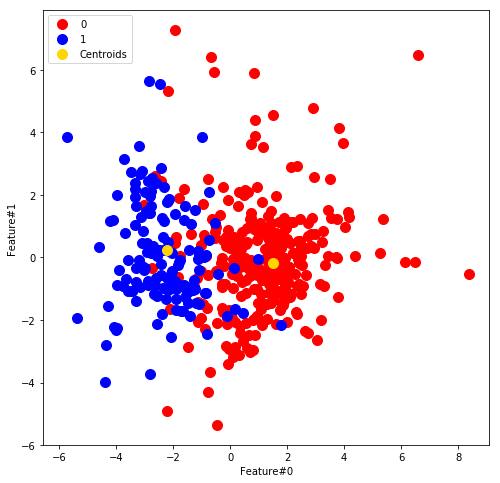

In [25]:
import matplotlib.pyplot as plt
y_pred = df['Channel']
X_data = data_pca
plt.figure(figsize=(8, 8))

plt.scatter(X_data[y_pred == 0, 0], X_data[y_pred == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(X_data[y_pred == 1, 0], X_data[y_pred == 1, 1], s = 100, c = 'blue', label = '1')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'gold', label = 'Centroids')

plt.xlabel("Feature#0")
plt.ylabel("Feature#1")
plt.legend()
plt.show()

答え：

ドロップした特徴量'Channel'はクラスラベルが2分割であり，今回，2分割したクラスタと比較すると，89.1% が一致している。

上の図は，特徴量'Channel'の散布図であり，既出の2分割したクラスタとの一致率は高い。

特徴量'Channel'は，教師情報（クラスラベル）のような存在であり，'Channel'以外のクラスタリングに使った特徴量に大きな影響を与えている。

ドロップした特徴量'Region'は，3分割であり，もし，これが教師情報の役目をしているとしたら，クラスタは6分割が妥当ということになる。念のため，次に，散布図で比較してみた。

下の散布図を見ると，クラスタの境界はまったく一致していない。（色分けは一致させていない）

In [26]:
data_original.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
210,1,1,18567,1895,1393,1801,244,2100
55,1,3,5264,3683,5005,1057,2024,1130
265,1,1,5909,23527,13699,10155,830,3636
145,2,3,22039,8384,34792,42,12591,4430
90,1,3,11405,596,1638,3347,69,360
188,2,3,8040,7639,11687,2758,6839,404
427,1,3,31012,16687,5429,15082,439,1163
150,1,3,16225,1825,1765,853,170,1067
328,1,2,16933,2209,3389,7849,210,1534
332,1,2,22321,3216,1447,2208,178,2602


In [27]:
df2 = data_original.copy()
df2['Channel'] = df2['Channel'].map({1: 0, 2: 3}).astype(int)
df2['Class'] = df2['Channel'] + df2['Region'] - 1
df2.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Class
66,0,3,9,1534,7417,175,3468,27,2
45,3,3,5181,22044,21531,1740,7353,4985,5
322,0,2,15881,713,3315,3703,1470,229,1
373,3,3,15076,6257,7398,1504,1916,3113,5
71,0,3,18291,1266,21042,5373,4173,14472,2
228,0,1,1869,577,572,950,4762,203,0
351,3,3,1210,10044,22294,1741,12638,3137,5
311,0,2,29635,2335,8280,3046,371,117,1
391,0,3,2647,2761,2313,907,95,1827,2
123,3,3,11170,10769,8814,2194,1976,143,5


In [28]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)

y_pred6 = km.fit_predict(data_pca)

6分割クラスタの散布図

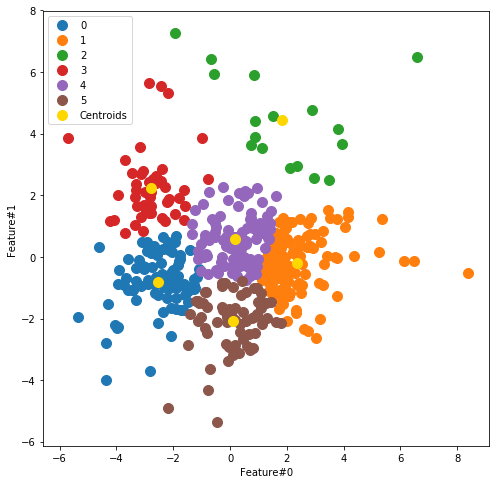

In [29]:
import matplotlib.pyplot as plt
y_pred = y_pred6
X_data = data_pca
plt.figure(figsize=(8, 8))

for i in np.arange(6):
    plt.scatter(X_data[y_pred == i, 0], X_data[y_pred == i, 1], s = 100, label = str(i))

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'gold', label = 'Centroids')

plt.xlabel("Feature#0")
plt.ylabel("Feature#1")
plt.legend()
plt.show()

特徴量'Class'，'Channel'を合体した散布図

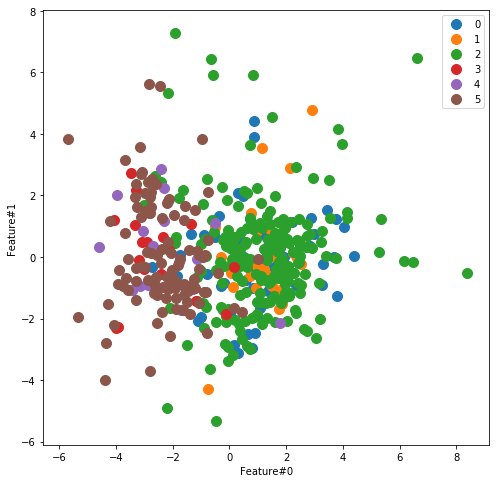

In [30]:
import matplotlib.pyplot as plt
y_pred =  df2['Class']
X_data = data_pca
plt.figure(figsize=(8, 8))

for i in np.arange(6):
    plt.scatter(X_data[y_pred == i, 0], X_data[y_pred == i, 1], s = 100, label = str(i))

# plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'gold', label = 'Centroids')

plt.xlabel("Feature#0")
plt.ylabel("Feature#1")
plt.legend()
plt.show()

### 【課題】卸売業者への報告
クラスタリングを行ったことを元に、卸売業者に対して有益な情報を報告してください。クラスタリングについては詳しくない卸売業者の経営陣に説明するような平易な書き方を心がけてください。

（ヒント１）

既知のグループとの比較結果は報告に使えるはずです。

（ヒント２）

data_originalに対してy_kmごとの要約統計量を見てみましょう。groupbyを使うのがおすすめです。新しく合計金額を特徴量として入れるのも良いでしょう。

（ヒント３）

クラスタ、k-menasなどの言葉は使わないで説明してみましょう。

答え：

顧客は，2つのグループに分けられます。これをセグメント#0と#1とします。このセグメンテーションは，'Channel'販売チャンネルと約９０パーセント一致しています。

セグメント#0は，ほぼ 'Horeca'ホテル・レストラン・カフェであり，セグメント#1は，ほぼ 'Retail'食料品小売店です。'Region'販売地域は，セグメンテーションにあまり関係ありません。

マーケティングはこれらのセグメンテーションに基づいて行うべきです。

セグメント#0では，'Milk'牛乳，'Grocery'一般食品，'Detergents_Paper'洗剤類のウェイトが高く，

セグメント#1では，'Fresh'生鮮食品，'Frozen'冷凍食品，'Delicatessen'惣菜のウェイトが高いです。

品揃えは，セグメント別に変えるべきであります。

また，セグメント#1には，毎日配送するべきだが，セグメント#0には，数日ごとでも大丈夫そうです。

以上

ヒートマップ

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object') 6


Text(0,0.5,'Principal components')

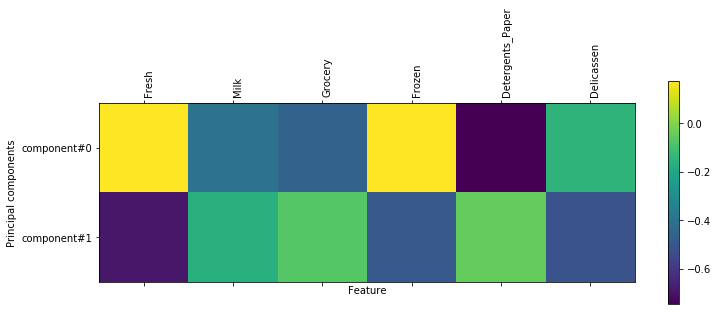

In [31]:
col = data.columns
print(col, len(col))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["component#0", "component#1"])
plt.colorbar()
plt.xticks(range(len(col)),
           col, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [32]:
y_data = pd.DataFrame(y_km, columns=['y_km'])
y_data.head()

,y_km
0,1
1,1
2,1
3,0
4,1


In [33]:
df_km = pd.concat([y_data, data_original], axis=1)
df_km.head()

,y_km,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,1,2,3,6353,8808,7684,2405,3516,7844
3,0,1,3,13265,1196,4221,6404,507,1788
4,1,2,3,22615,5410,7198,3915,1777,5185


セグメント別要約統計量

In [34]:
pd.set_option("display.max_rows", 72)
df_km.groupby(['y_km'], as_index=False).describe().T

0              1
y_km             count    262.000000     178.000000
                 mean       0.000000       1.000000
                 std        0.000000       0.000000
                 min        0.000000       1.000000
                 25%        0.000000       1.000000
                 50%        0.000000       1.000000
                 75%        0.000000       1.000000
                 max        0.000000       1.000000
Channel          count    262.000000     178.000000
                 mean       1.022901       1.764045
                 std        0.149873       0.425792
                 min        1.000000       1.000000
                 25%        1.000000       2.000000
                 50%        1.000000       2.000000
                 75%        1.000000       2.000000
                 max        2.000000       2.000000
Region           count    262.000000     178.000000
                 mean       2.511450       2.589888
                 std        0.796221       0.740521
                 min        1.000000       1.000000
                 25%        2.000000       2.000000
                 50%        3.000000       3.000000
                 75%        3.000000       3.000000
                 max        3.000000       3.000000
Fresh            count    262.000000     178.000000
                 mean   14306.583969    8605.651685
                 std    12936.369897   11423.333014
                 min        3.000000       3.000000
                 25%     5059.000000    2026.000000
                 50%    10724.500000    5339.500000
                 75%    19186.000000   11798.750000
                 max    76237.000000  112151.000000
Milk             count    262.000000     178.000000
                 mean    2959.145038    9972.252809
                 std     3868.752082    9141.957121
                 min       55.000000    1115.000000
                 25%     1054.500000    5272.250000
                 50%     1916.500000    7529.500000
                 75%     3618.250000   11101.000000
                 max    43950.000000   73498.000000
Grocery          count    262.000000     178.000000
                 mean    3282.427481   14823.404494
                 std     2871.018926   11492.421673
                 min        3.000000    2824.000000
                 25%     1642.750000    8028.750000
                 50%     2466.500000   11443.000000
                 75%     4029.750000   18667.750000
                 max    20170.000000   92780.000000
Frozen           count    262.000000     178.000000
                 mean    4085.167939    1580.539326
                 std     5878.266968    1935.089668
                 min       47.000000      25.000000
                 25%      909.250000     419.000000
                 50%     2282.500000    1028.500000
                 75%     5318.000000    1904.750000
                 max    60869.000000   16745.000000
Detergents_Paper count    262.000000     178.000000
                 mean     471.396947    6428.938202
                 std      510.597459    5894.377892
                 min        3.000000     223.000000
                 25%      168.250000    2998.500000
                 50%      322.000000    4606.500000
                 75%      625.500000    7407.000000
                 max     4762.000000   40827.000000
Delicassen       count    262.000000     178.000000
                 mean    1356.374046    1772.882022
                 std     3199.243980    2128.102816
                 min        3.000000       3.000000
                 25%      383.000000     534.500000
                 50%      804.000000    1311.500000
                 75%     1449.750000    2156.000000
                 max    47943.000000   16523.000000

In [35]:
pd.set_option("display.max_rows", 50)

セグメント別の売り上げ

In [36]:
df_km.groupby(['y_km'], as_index=False).sum()

,y_km,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,268,658,3748325,775296,859996,1070314,123506,355370
1,1,314,461,1531806,1775061,2638566,281336,1144351,315573


販売チャンネル別の売り上げ

In [37]:
df_km.groupby(['Channel'], as_index=False).sum()

,Channel,y_km,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,42,748,4015717,1028614,1180717,1116979,235587,421955
1,2,136,371,1264414,1521743,2317845,234671,1032270,248988
